In [ ]:
# packages and libraries

# NLP and preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# utilities
import os
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""
Dataset uploading procedure:
1. download dataset from https://www.kaggle.com/kazanova/sentiment140
2. Rename file as 'train.csv'
3. Upload file to Google Drive
4. Run this cell and follow instructions
"""
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load dataset
df = pd.read_csv('/content/gdrive/MyDrive/train.csv', encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

In [ ]:
import random
random.seed = 10
# selecting 100000 random elements from the dataset to train on
ind = [i for i in range(len(df.text))]
random.shuffle(ind)
X=np.array(df.text[ind][:100000])
y=np.array(df.target[ind][:100000])

In [ ]:
# Polarity dictionnary
pol_dict = {0:'negative', 4:'positive'}

In [ ]:
# preprocessing of the tweets
def preProcess(X):
    regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z]+"
    stop_words=stopwords.words('english')
    stemmer=PorterStemmer()

    cleaned_data=[]
    for i in range(len(X)):
        tweet=re.sub(regex,' ',X[i]) # remove unnecessary stuff (punctuation, urls, etc.)
        tweet=tweet.lower().split()
        tweet = [word for word in tweet if (word not in stop_words)]
        tweet=' '.join(tweet)
        cleaned_data.append(tweet)
        
    return np.array(cleaned_data)

In [ ]:
# clean data
X = preProcess(X)

In [ ]:
# Count vectorizer (bag of words)
cv = CountVectorizer(max_features=3000)
X_cv = cv.fit_transform(X)

# Term frequencies
tf_transformer = TfidfTransformer(use_idf=False).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

# tf-idf
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_cv)

# n-gram
ngram_vectorizer = TfidfVectorizer(ngram_range=(2,3), max_features=3000)
X_ngram = ngram_vectorizer.fit_transform(X)

words= cv.get_feature_names()

In [ ]:
# Tests
print('Shape of X:', X.shape)
print('Shape of X_cv:', X_cv.shape)
print('Shape of X_tf:', X_tf.shape)
print('Shape of X_tfidf:', X_tfidf.shape)

print(X[0])
# print(words[4999])
# print(X_cv.toarray()[0])
# print(X_tf.toarray()[0])
# print(X_tfidf.toarray()[0])

Shape of X: (100000,)
Shape of X_cv: (100000, 3000)
Shape of X_tf: (100000, 3000)
Shape of X_tfidf: (100000, 3000)
self control


In [ ]:
# Exploration - Mots les plus utilisés

freq_words = X_cv.sum(axis=0)
freq_words_array = np.squeeze(np.asarray(freq_words))
freq_words_array
N_most_freq_words_index = np.argpartition(freq_words_array, -10)[-10:]
N_most_freq_words_index
words_list = [words[i] for i in N_most_freq_words_index]
words_list

['going', 'love', 'work', 'today', 'go', 'good', 'like', 'get', 'day', 'quot']

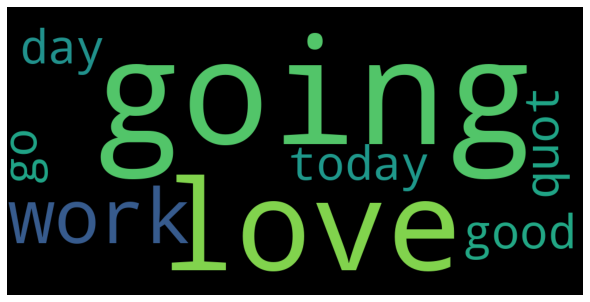

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# FONCTIONNE PAS PARCE QUE J'AI JUSTE PRIS 10 MOTS SANS LEUR FRÉQUENCE... - JU
# SI ON A LE TEMPS

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words_list))
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_cv.toarray(),y,test_size=0.3)

# Create classifier
gaussianNB_classifier=GaussianNB()

# Train classifier
gaussianNB_classifier.fit(X_train,y_train)

# Test classifier
y_pred=gaussianNB_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('Gaussian NB report:\n',cf)

Gaussian NB report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63     15041
           4       0.64      0.79      0.71     14959

    accuracy                           0.67     30000
   macro avg       0.68      0.67      0.67     30000
weighted avg       0.68      0.67      0.67     30000



In [ ]:
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,test_size=0.3)

# Create classifier
multinomialNB_classifier=MultinomialNB()

# Train classifier
multinomialNB_classifier.fit(X_train,y_train)

# Test classifier
y_pred=multinomialNB_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('Multinomial NB report:\n',cf)

Multinomial NB report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75     14984
           4       0.75      0.72      0.74     15016

    accuracy                           0.74     30000
   macro avg       0.74      0.74      0.74     30000
weighted avg       0.74      0.74      0.74     30000



In [ ]:
# SVM
from sklearn.svm import SVC

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.3)
  
# Create classifiers
linearSVM_classifier=SVC(kernel='linear')
polySVM_classifier=SVC(kernel='poly')
rbfSVM_classifier=SVC(kernel='rbf')

# Train classifiers
linearSVM_classifier.fit(X_train,y_train)
polySVM_classifier.fit(X_train,y_train)
rbfSVM_classifier.fit(X_train,y_train)

# Test classifiers
y_pred=linearSVM_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('linear SVM report:\n',cf)

y_pred=polySVM_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('poly SVM report:\n',cf)

y_pred=rbfSVM_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('rbf SVM report:\n',cf)

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,test_size=0.3)

# Create classifier
dt_classifier = DecisionTreeClassifier(criterion= "gini")
# dt_classifier = DecisionTreeClassifier(criterion="entropy") # ne fait pas une différence marquée

# Train classifier
dt_classifier.fit(X_train,y_train)

# Test classifier
y_pred=dt_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('Decision Tree report:\n',cf)

Decision Tree report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68     14972
           4       0.68      0.67      0.67     15028

    accuracy                           0.67     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.67      0.67      0.67     30000



In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,test_size=0.3)

# Create classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train classifier
rf_classifier.fit(X_train,y_train)

# Test classifier
y_pred = rf_classifier.predict(X_test)
rf_classifier = classification_report(y_test,y_pred)
print('Random forests report:\n',rf_classifier)

Random forests report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72     14865
           4       0.73      0.74      0.73     15135

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000



In [ ]:
# K-Nearest-Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,test_size=0.3)

# Create classifier
knn_classifier=KNeighborsClassifier(n_neighbors=5)

# Train classifier
knn_classifier.fit(X_train,y_train)

# Test classifier
y_pred=knn_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('K-Nearest-Neighbors report:\n',cf)

K-Nearest-Neighbors report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62     14888
           4       0.64      0.76      0.69     15112

    accuracy                           0.66     30000
   macro avg       0.67      0.66      0.66     30000
weighted avg       0.67      0.66      0.66     30000



In [ ]:
# Multilayer Perceptron
from sklearn.neural_network import MLPClassifier

# Split dataset
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.3)

# Create classifier
MPLClassifier_classifier = MLPClassifier(hidden_layer_sizes=(30,25), max_iter=200, activation = 'relu' ,solver='adam', random_state=1)

# Train classifier
MPLClassifier_classifier.fit(X_train,y_train)

# Test classifier
y_pred=MPLClassifier_classifier.predict(X_test)
cf=classification_report(y_test,y_pred)
print('MPL Classifier report:\n',cf)

In [ ]:
import tweepy as tw
auth = tw.OAuthHandler('5SEuOWGiZG6GX5HGaMLWEf7tA', 'LBz3HzFYyFLOfocDIxwqpoO2lJm4tyXmt8EqZXgfiuVtn8uUiS')
auth.set_access_token('1375850370329612298-wAzfKvHK88jgg2KcNnwZIqJj4LCA6H', 'Qzfoz2HjezvReUgvOyk142PZ1WwCQ9GdXeD8f0BJMSZHe')
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
def fetchTweets(users,count):
  fetched_tweets = []
  for user in users:
    try:
        fetched_tweets_user = api.user_timeline(screen_name=user, include_rts=False, exclude_replies=True, count=200, tweet_mode="extended")
        print(f"Fetched {str(len(fetched_tweets_user))} tweets from {user}.")
        fetched_tweets += fetched_tweets_user
    except:
        print(f"Could not fetch tweets from {user}.")

  return fetched_tweets

In [ ]:
democrats = {'BarackObama': 'Barack Obama', 'BernieSanders': 'Bernie Sanders', 'KamalaHarris': 'Kamala Harris', 'JoeBiden': 'Joe Biden', 'BillClinton': 'Bill Cliton', 'HillaryClinton': 'Hillary Clinton', 'SpeakerPelosi': 'Nancy Pelosi', 'AOC': 'Alexandria Ocasio-Cortez'}
republicans = {'Schwarzenegger': 'Arnold Schwarzenegger', 'Mike_Pence': 'Mike Pence', 'tedcruz': 'Ted Cruz', 'RickSantorum': 'Rick Santorum', 'RealBenCarson': 'Ben Carson', 'LindseyGrahamSC': 'Lindsey Graham', 'BobbyJindal': 'Bobby Jindal', 'JebBush': 'Jeb Bush'}
politicians = {}
politicians.update(democrats)
politicians.update(republicans)

print(democrats.values())
print(republicans.values())
print(politicians.values())

dict_values(['Barack Obama', 'Bernie Sanders', 'Kamala Harris', 'Joe Biden', 'Bill Cliton', 'Hillary Clinton', 'Nancy Pelosi', 'Alexandria Ocasio-Cortez'])
dict_values(['Arnold Schwarzenegger', 'Mike Pence', 'Ted Cruz', 'Rick Santorum', 'Ben Carson', 'Lindsey Graham', 'Bobby Jindal', 'Jeb Bush'])
dict_values(['Barack Obama', 'Bernie Sanders', 'Kamala Harris', 'Joe Biden', 'Bill Cliton', 'Hillary Clinton', 'Nancy Pelosi', 'Alexandria Ocasio-Cortez', 'Arnold Schwarzenegger', 'Mike Pence', 'Ted Cruz', 'Rick Santorum', 'Ben Carson', 'Lindsey Graham', 'Bobby Jindal', 'Jeb Bush'])


In [ ]:
fetched = fetchTweets(politicians,200)
print(len(fetched))
print(fetched[0])

Fetched 161 tweets from BarackObama.
Fetched 183 tweets from BernieSanders.
Fetched 50 tweets from KamalaHarris.
Fetched 43 tweets from JoeBiden.
Fetched 164 tweets from BillClinton.
Fetched 147 tweets from HillaryClinton.
Fetched 155 tweets from SpeakerPelosi.
Fetched 81 tweets from AOC.
Fetched 92 tweets from Schwarzenegger.
Fetched 89 tweets from Mike_Pence.
Fetched 102 tweets from tedcruz.
Fetched 130 tweets from RickSantorum.
Fetched 94 tweets from RealBenCarson.
Fetched 103 tweets from LindseyGrahamSC.
Fetched 186 tweets from BobbyJindal.
Fetched 93 tweets from JebBush.
1873
Status(_api=<tweepy.api.API object at 0x7fafcabaea90>, _json={'created_at': 'Mon Apr 26 21:55:27 +0000 2021', 'id': 1386801123076489224, 'id_str': '1386801123076489224', 'full_text': 'States have just learned how many seats they have in Congress for the next decade. This process is an important step in making sure our maps—and electoral process—better reflect our communities. Get involved in the fight for fai

In [ ]:
tweets = [tweet.full_text for tweet in fetched]
users = [tweet.user.screen_name for tweet in fetched]
cleaned_tweets = preProcess(tweets)
tweets_cv = cv.transform(cleaned_tweets)
tweets_tf = tf_transformer.transform(tweets_cv)
tweets_tfidf = tfidf_transformer.transform(tweets_cv)

In [ ]:
# Exploration - Mots les plus utilisés

freq_words = tweets_cv.sum(axis=0)
freq_words_array = np.squeeze(np.asarray(freq_words))
freq_words_array
N_most_freq_words_index = np.argpartition(freq_words_array, -10)[-10:]
N_most_freq_words_index
words_list = [words[i] for i in N_most_freq_words_index]
words_list

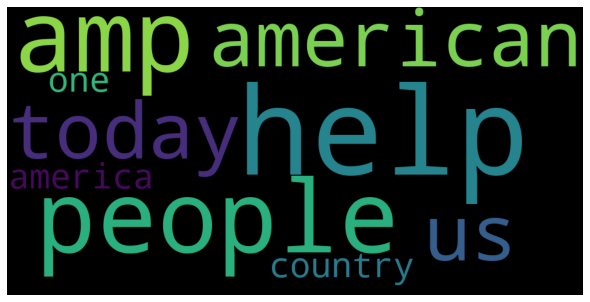

In [ ]:
ind = [i for i in range(len(users)) if users[i] in democrats]
freq_words = tweets_cv[ind].sum(axis=0)
freq_words_array = np.squeeze(np.asarray(freq_words))
freq_words_array
N_most_freq_words_index = np.argpartition(freq_words_array, -10)[-10:]
N_most_freq_words_index
words_list = [words[i] for i in N_most_freq_words_index]
words_list
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words_list))
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

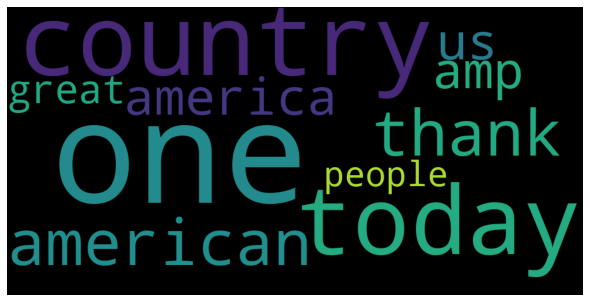

In [ ]:
ind = [i for i in range(len(users)) if users[i] in republicans]
freq_words = tweets_cv[ind].sum(axis=0)
freq_words_array = np.squeeze(np.asarray(freq_words))
freq_words_array
N_most_freq_words_index = np.argpartition(freq_words_array, -10)[-10:]
N_most_freq_words_index
words_list = [words[i] for i in N_most_freq_words_index]
words_list
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words_list))
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
# Find polarity of tweets using previously trained models
polarity_gaussianNB = gaussianNB_classifier.predict(tweets_cv.toarray())
polarity_multinomialNB = multinomialNB_classifier.predict(tweets_cv)
polarity_linearSVM = linearSVM_classifier.predict(tweets_tfidf)
polarity_polySVM = polySVM_classifier.predict(tweets_tfidf)
polarity_rbfSVM = rbfSVM_classifier.predict(tweets_tfidf)
polarity_dt = dt_classifier.predict(tweets_cv)
polarity_knn = knn_classifier.predict(tweets_cv)
polarity_MPL = MPLClassifier_classifier.predict(tweets_cv)

In [ ]:
# Pretty print of 20 elements to analyze accuracy
# for i in range(0,1000,50):
#   print(f'{users[i]}: {tweets[i]} \nPolarity: {pol_dict[np.bincount(polarity[i]).argmax()]}\n—————————————————')

# Test only with multionimial NB
for i in range(0,1000,50):
  print(f'{users[i]}: {tweets[i]} \nPolarity: {pol_dict[polarity[i]]}\n—————————————————')

[4 4 4 ... 4 4 4]


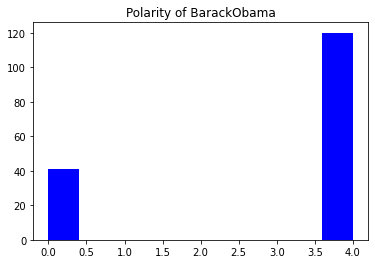

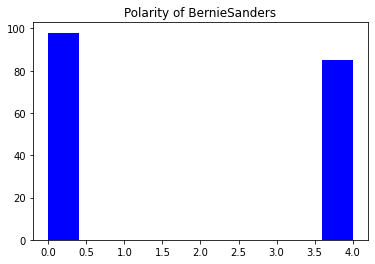

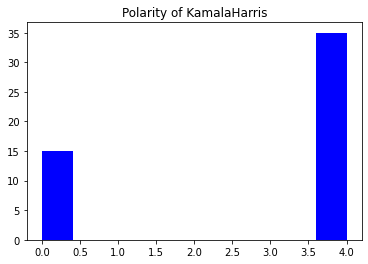

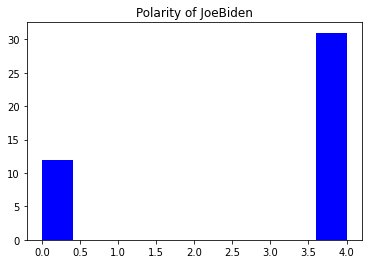

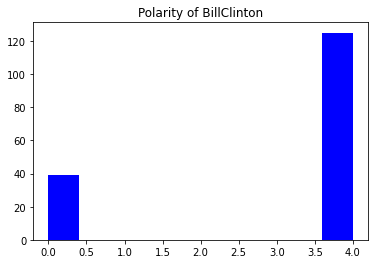

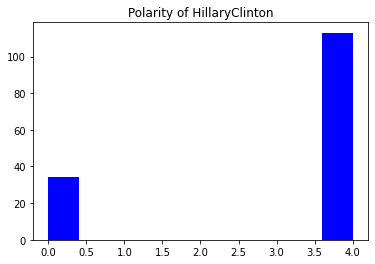

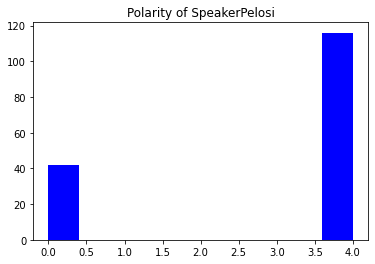

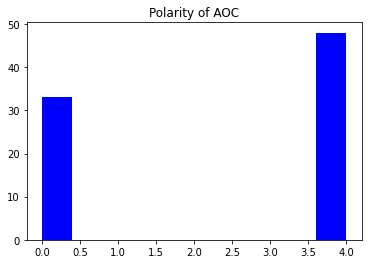

In [ ]:
import matplotlib.pyplot as plt
polarity_multinomialNB = multinomialNB_classifier.predict(tweets_cv)
print(polarity_multinomialNB)

for pol in democrats:
  ind = [i for i in range(len(users)) if users[i] == pol]
  plt.title(f"Polarity of {pol}")
  plt.hist(polarity_rbfSVM[ind], color='blue')
  plt.show()

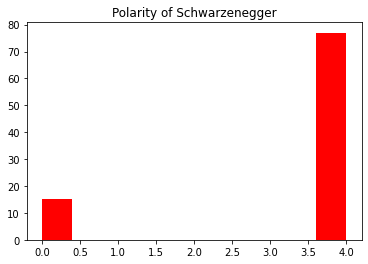

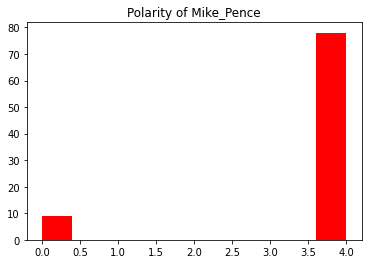

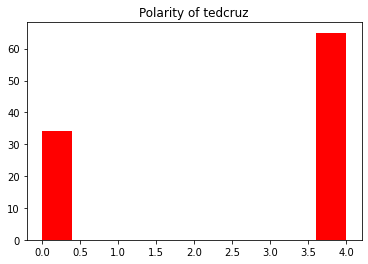

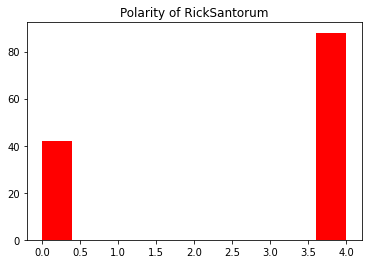

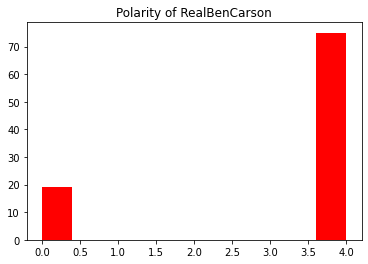

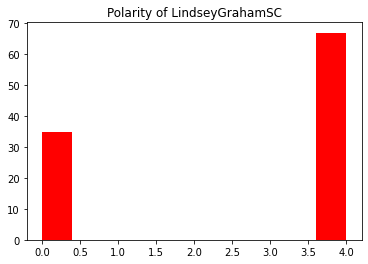

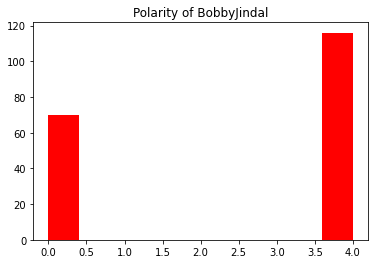

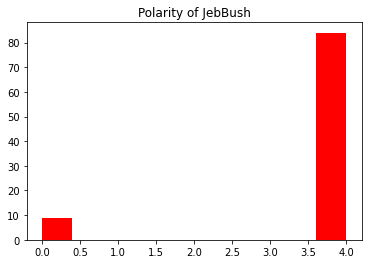

In [ ]:
for pol in republicans:
  ind = [i for i in range(len(users)) if users[i] == pol]
  plt.title(f"Polarity of {pol}")
  plt.hist(polarity_rbfSVM[ind], color='red')
  plt.show()

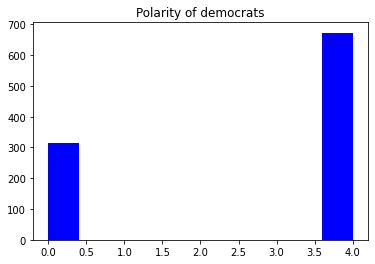

Negative tweets = 0.3181357649442756
Positive tweets = 0.6818642350557245


In [ ]:
ind = [i for i in range(len(users)) if users[i] in democrats]
plt.title(f"Polarity of democrats")
plt.hist(polarity_rbfSVM[ind], color='blue')
plt.show()
print('Negative tweets =',(polarity_rbfSVM[ind]==0).sum()/len(polarity_rbfSVM[ind]))
print('Positive tweets =',(polarity_rbfSVM[ind]==4).sum()/len(polarity_rbfSVM[ind]))

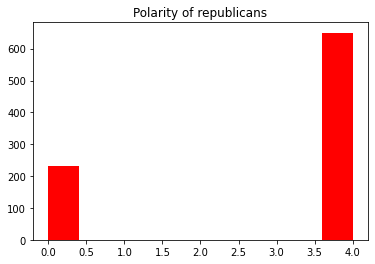

Negative tweets = 0.2638731596828992
Positive tweets = 0.7361268403171007


In [ ]:
ind = [i for i in range(len(users)) if users[i] in republicans]
plt.title(f"Polarity of republicans")
plt.hist(polarity_rbfSVM[ind], color='red')
plt.show()
print('Negative tweets =',(polarity_rbfSVM[ind]==0).sum()/len(polarity_rbfSVM[ind]))
print('Positive tweets =',(polarity_rbfSVM[ind]==4).sum()/len(polarity_rbfSVM[ind]))

In [ ]:
# SVM - Entrainement
#import pandas as pd # Pour import les données/pré-traitement
#from sklearn.feature_extraction.text import TfidfVectorizer # Pour pré-traitement au besoin
import time
from sklearn import svm
from sklearn.metrics import classification_report

# pré-traitement
testData = 

trainData = 

train_vectors = 

test_vectors = 

for kernel in ('linear', 'poly', 'rbf'):
  # Perform classification with SVM, kernel=linear, poly and rbf
  classifier = svm.SVC(kernel=kernel)
  t0 = time.time()

  classifier.fit(train_vectors, trainData['Label'])
  t1 = time.time()

  prediction = classifier.predict(test_vectors)
  t2 = time.time()

  time_train = t1-t0
  time_predict = t2-t1

  # results
  print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
  report = classification_report(testData['Label'], prediction, output_dict=True)
  print('positive: ', report['pos'])
  print('negative: ', report['neg'])

In [ ]:
# SVM - Predictions

# tweets pré-traités
tweets = 

results = classifier.predict(tweets)

https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1

Arbres de décision

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Bayes

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))